In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0.0,72,1,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,0.0,75,2,30.188278,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,0.0,83,2,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,0.0,43,2,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,0.0,75,2,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [7]:
df_sub = df[['outcome', 'age', 'BMI', 'PCO2', 'heart rate', 'hematocrit', 'INR', 'Urea nitrogen', 'Comorbidities' , 'Respiratory rate' , 'Lactic acid', 'RDW', 'Creatine kinase', 'Anion gap', 'Magnesium ion']].copy()

In [8]:
# Create our features
X = df_sub.drop('outcome', axis=1)
y = df_sub['outcome']

In [9]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Calculate the accuracy score
    y_pred_model = model.predict(X_test)
    accuracy_score_model = accuracy_score(y_test, y_pred_model)
    
    print(f"Accuracy score: {accuracy_score_model}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [10]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train_old, X_test, y_train_old, y_test = train_test_split(X, y, random_state=42)

print(len(X_train_old) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [11]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(X_train_old, y_train_old)
Counter(y_train)

Counter({0.0: 414, 1.0: 665})

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74       414
         1.0       0.82      0.88      0.85       665

    accuracy                           0.81      1079
   macro avg       0.80      0.79      0.79      1079
weighted avg       0.81      0.81      0.81      1079

[[286 128]
 [ 78 587]]
root mean squared error (RMSE): 0.43694109010108106
R-squared (R2 ): 0.19264102284697238
MAE 0.19091751621872105

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.52      0.67       250
         1.0       0.22      0.77      0.34        44

    accuracy                           0.56       294
   macro avg       0.57      0.65      0.51       294
weighted avg       0.82      0.56      0.62       294

[[130 120]
 [ 10  34]]
root mean squared error (RMSE): 0.6649638116080449
R-squared (R2 ): -2.474545454545454
MAE 0.4421768707482993

Accuracy score: 0.5578231292517006



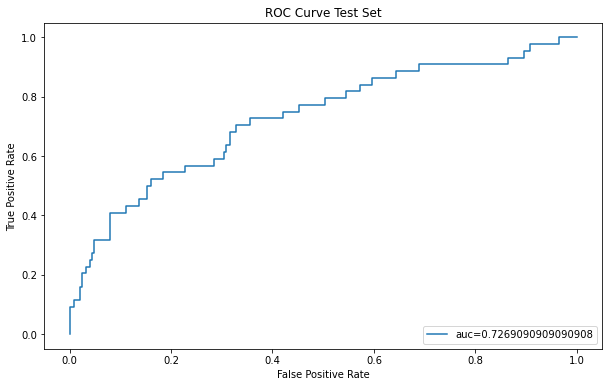

In [13]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [14]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

             Feature  Importance
1         heart rate    0.886935
4      Urea nitrogen    0.844102
7        Lactic acid    0.600422
9    Creatine kinase    0.462280
5      Comorbidities    0.417330
8                RDW    0.375446
6   Respiratory rate    0.226741
11     Magnesium ion    0.216296
10         Anion gap    0.010925
3                INR   -0.002327
2         hematocrit   -0.072664
0               PCO2   -0.376410


TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00       665

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079

[[414   0]
 [  0 665]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.89      0.70      0.78       250
         1.0       0.23      0.50      0.31        44

    accuracy                           0.67       294
   macro avg       0.56      0.60      0.55       294
weighted avg       0.79      0.67      0.71       294

[[175  75]
 [ 22  22]]
root mean squared error (RMSE): 0.5743970515149913
R-squared (R2 ): -1.592545454545454
MAE 0.3299319727891156

Accuracy score: 0.6700680272108843



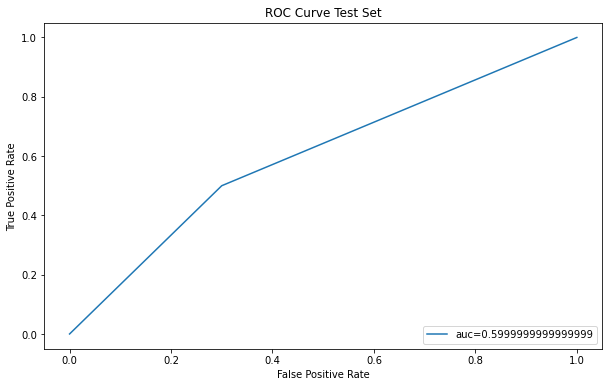

In [15]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00       665

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079

[[414   0]
 [  0 665]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.83       250
         1.0       0.28      0.52      0.37        44

    accuracy                           0.73       294
   macro avg       0.59      0.64      0.60       294
weighted avg       0.81      0.73      0.76       294

[[191  59]
 [ 21  23]]
root mean squared error (RMSE): 0.5216405309573011
R-squared (R2 ): -1.1381818181818177
MAE 0.272108843537415

Accuracy score: 0.7278911564625851



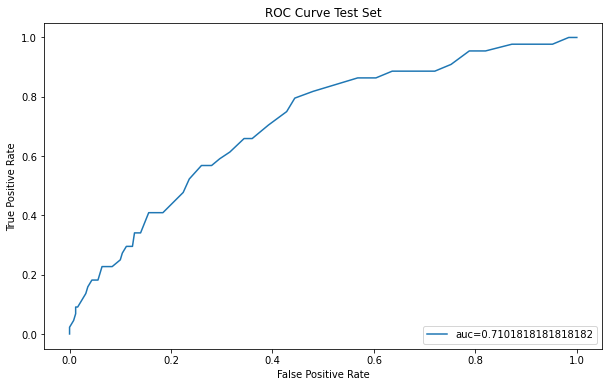

In [16]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [17]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.141467396555117, 'Urea nitrogen'),
 (0.13377739249061218, 'heart rate'),
 (0.1111075835206455, 'RDW'),
 (0.10081023344413406, 'Lactic acid'),
 (0.09583445704338676, 'PCO2'),
 (0.0723431866229368, 'Comorbidities'),
 (0.06958222395866318, 'Magnesium ion'),
 (0.060808551252656044, 'Anion gap'),
 (0.05916011303181975, 'Respiratory rate'),
 (0.0560317396247845, 'Creatine kinase'),
 (0.05488408697540948, 'hematocrit'),
 (0.04419303547983488, 'INR')]

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00       665

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079

[[414   0]
 [  0 665]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       250
         1.0       0.27      0.45      0.34        44

    accuracy                           0.74       294
   macro avg       0.58      0.62      0.59       294
weighted avg       0.80      0.74      0.76       294

[[197  53]
 [ 24  20]]
root mean squared error (RMSE): 0.511766315719159
R-squared (R2 ): -1.0579999999999998
MAE 0.2619047619047619

Accuracy score: 0.7380952380952381



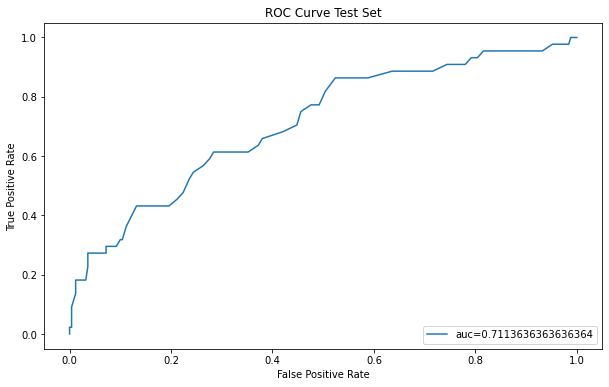

In [18]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       414
         1.0       0.90      0.93      0.92       665

    accuracy                           0.89      1079
   macro avg       0.89      0.88      0.89      1079
weighted avg       0.89      0.89      0.89      1079

[[348  66]
 [ 48 617]]
root mean squared error (RMSE): 0.32504366285441794
R-squared (R2 ): 0.5532091097308488
MAE 0.1056533827618165

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75       250
         1.0       0.20      0.50      0.29        44

    accuracy                           0.63       294
   macro avg       0.54      0.57      0.52       294
weighted avg       0.78      0.63      0.68       294

[[162  88]
 [ 22  22]]
root mean squared error (RMSE): 0.6116777418411966
R-squared (R2 ): -1.9399999999999995
MAE 0.3741496598639456

Accuracy score: 0.6258503401360545



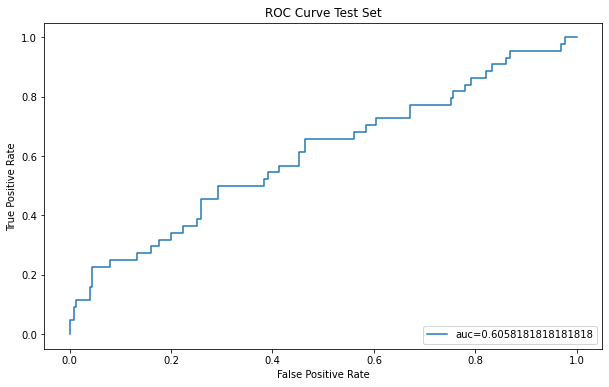

In [19]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       414
         1.0       0.98      0.99      0.99       665

    accuracy                           0.98      1079
   macro avg       0.98      0.98      0.98      1079
weighted avg       0.98      0.98      0.98      1079

[[399  15]
 [  5 660]]
root mean squared error (RMSE): 0.13614580855202116
R-squared (R2 ): 0.9216156332861138
MAE 0.018535681186283594

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81       250
         1.0       0.26      0.52      0.34        44

    accuracy                           0.70       294
   macro avg       0.58      0.63      0.57       294
weighted avg       0.80      0.70      0.74       294

[[183  67]
 [ 21  23]]
root mean squared error (RMSE): 0.5471012044321932
R-squared (R2 ): -1.3519999999999999
MAE 0.29931972789115646

Accuracy score: 0.7006802721088435



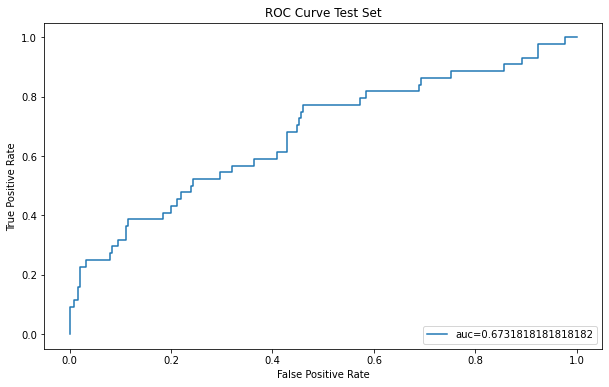

In [20]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00       665

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079

[[414   0]
 [  0 665]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       250
         1.0       0.30      0.55      0.39        44

    accuracy                           0.74       294
   macro avg       0.60      0.66      0.61       294
weighted avg       0.82      0.74      0.77       294

[[194  56]
 [ 20  24]]
root mean squared error (RMSE): 0.5084322977157767
R-squared (R2 ): -1.031272727272727
MAE 0.2585034013605442

Accuracy score: 0.7414965986394558



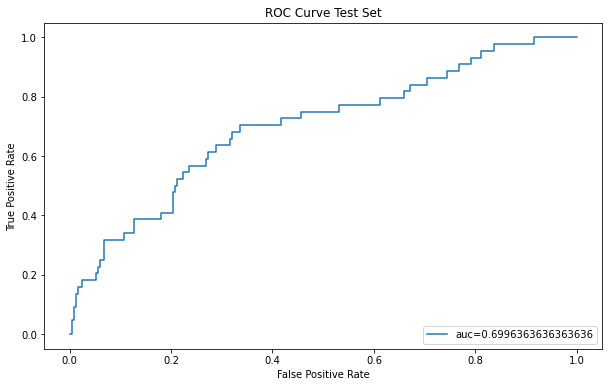

In [21]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00       665

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079

[[414   0]
 [  0 665]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       250
         1.0       0.33      0.55      0.41        44

    accuracy                           0.77       294
   macro avg       0.62      0.68      0.63       294
weighted avg       0.82      0.77      0.79       294

[[202  48]
 [ 20  24]]
root mean squared error (RMSE): 0.4809288065886704
R-squared (R2 ): -0.8174545454545452
MAE 0.23129251700680273

Accuracy score: 0.7687074829931972



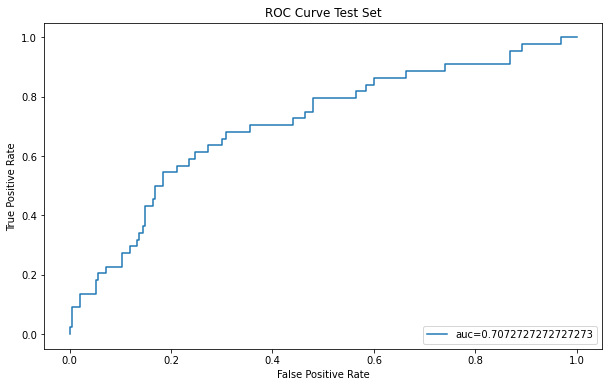

In [22]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       414
         1.0       0.90      0.96      0.93       665

    accuracy                           0.91      1079
   macro avg       0.92      0.90      0.90      1079
weighted avg       0.91      0.91      0.91      1079

[[344  70]
 [ 26 639]]
root mean squared error (RMSE): 0.29828052181488696
R-squared (R2 ): 0.6237550397733465
MAE 0.08897126969416126

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.62      0.73       250
         1.0       0.20      0.52      0.29        44

    accuracy                           0.61       294
   macro avg       0.54      0.57      0.51       294
weighted avg       0.78      0.61      0.66       294

[[156  94]
 [ 21  23]]
root mean squared error (RMSE): 0.6254250255506523
R-squared (R2 ): -2.0736363636363633
MAE 0.391156462585034

Accuracy score: 0.608843537414966



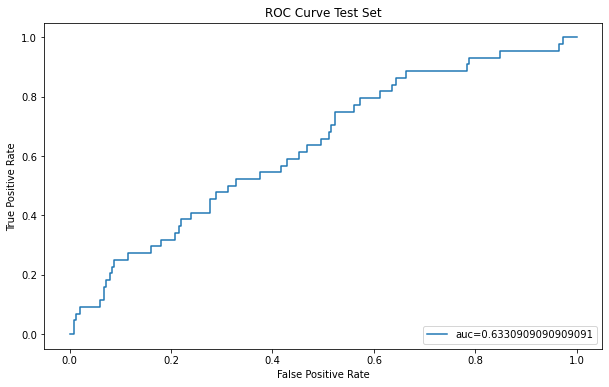

In [23]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

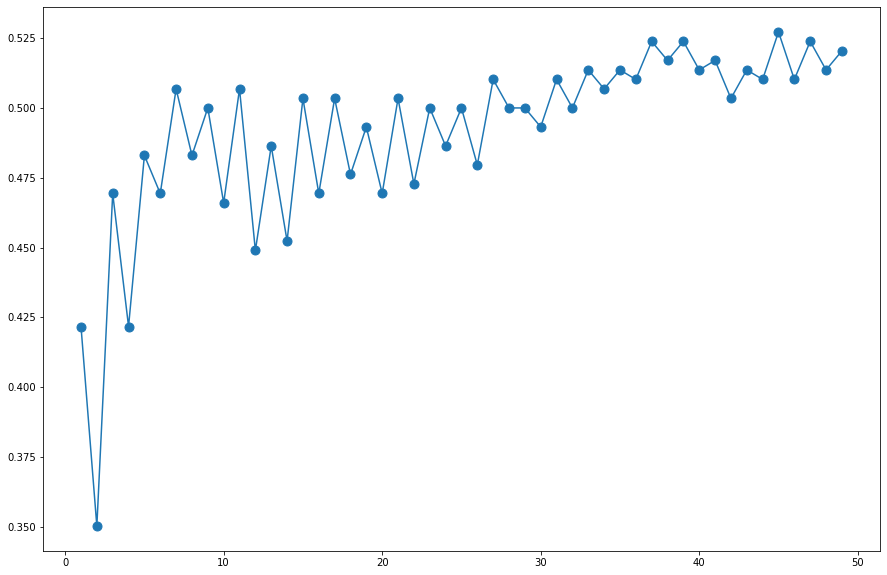

In [24]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89       414
         1.0       0.89      1.00      0.94       665

    accuracy                           0.92      1079
   macro avg       0.95      0.90      0.92      1079
weighted avg       0.93      0.92      0.92      1079

[[333  81]
 [  0 665]]
root mean squared error (RMSE): 0.27398815449659236
R-squared (R2 ): 0.682543314808761
MAE 0.07506950880444857

Testing SET
              precision    recall  f1-score   support

         0.0       0.89      0.51      0.65       250
         1.0       0.19      0.66      0.30        44

    accuracy                           0.53       294
   macro avg       0.54      0.58      0.47       294
weighted avg       0.79      0.53      0.60       294

[[127 123]
 [ 15  29]]
root mean squared error (RMSE): 0.6851187890446743
R-squared (R2 ): -2.688363636363636
MAE 0.46938775510204084

Accuracy score: 0.5306122448979592



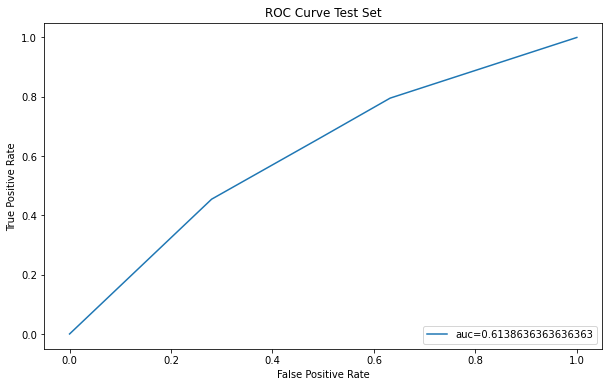

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)